In [1]:
pip install adjustText

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement adjustText (from versions: none)
ERROR: No matching distribution found for adjustText


In [3]:
import pandas as pd
import numpy as np
#import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset

anime = pd.read_csv('anime.csv')# for the app.py file

anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12230 entries, 0 to 12229
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12230 non-null  int64  
 1   name      12230 non-null  object 
 2   genre     12230 non-null  object 
 3   type      12208 non-null  object 
 4   episodes  12230 non-null  object 
 5   rating    12230 non-null  float64
 6   members   12230 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 669.0+ KB


In [42]:

import html

# Assuming df is your existing DataFrame
anime['name'] = anime['name'].apply(lambda x: html.unescape(x) if isinstance(x, str) else x)


In [43]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [45]:
anime = anime.dropna(subset=['genre'])
anime = anime.drop_duplicates(subset='name')

anime = anime.reset_index(drop=True)

anime['rating'] = anime['rating'].fillna(0)

In [47]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12230 entries, 0 to 12229
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12230 non-null  int64  
 1   name      12230 non-null  object 
 2   genre     12230 non-null  object 
 3   type      12208 non-null  object 
 4   episodes  12230 non-null  object 
 5   rating    12230 non-null  float64
 6   members   12230 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 669.0+ KB


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(anime['genre'])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

anime_indices = pd.Series(anime.index, index=anime['name']).to_dict()

In [49]:
def recommend_anime(fav_anime, genre_hint=None, top_n=10):
    if fav_anime not in anime_indices:
        return []

    idx = anime_indices[fav_anime]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:]

    anime_indices_similar = [i[0] for i in sim_scores]
    recommendations = anime.iloc[anime_indices_similar]

    if genre_hint:
        recommendations = recommendations[recommendations['genre'].str.contains(genre_hint, case=False, na=False)]

    return recommendations[['anime_id','name', 'genre', 'rating']].head(top_n)

In [50]:
recommend_anime("Bleach", genre_hint="Action", top_n=5)

,anime_id,name,genre,rating
946,8247,Bleach Movie 4: Jigoku-hen,"Action, Comedy, Shounen, Super Power, Supernat...",7.75
1131,4835,Bleach Movie 3: Fade to Black - Kimi no Na wo ...,"Action, Comedy, Shounen, Super Power, Supernat...",7.66
3287,11703,Code:Breaker,"Action, Comedy, School, Shounen, Super Power, ...",7.03
1244,18499,Yozakura Quartet: Tsuki ni Naku,"Action, Comedy, Magic, Shounen, Super Power, S...",7.62
1271,18497,Yozakura Quartet: Hana no Uta,"Action, Comedy, Magic, Shounen, Super Power, S...",7.61


In [51]:

import pickle

model = {
    'anime': anime,
    'cosine_sim': cosine_sim,
    'anime_indices': anime_indices
}

with open('anime_recommender.pkl', 'wb') as f:
    pickle.dump(model, f)
     

In [52]:
model['anime']


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12225,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12226,5543,Under World,Hentai,OVA,1,4.28,183
12227,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12228,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [53]:
model['anime'].name

0                                           Kimi no Na wa.
1                         Fullmetal Alchemist: Brotherhood
2                                                 Gintama°
3                                              Steins;Gate
4                                                 Gintama'
                               ...                        
12225         Toushindai My Lover: Minami tai Mecha-Minami
12226                                          Under World
12227                       Violence Gekiga David no Hoshi
12228    Violence Gekiga Shin David no Hoshi: Inma Dens...
12229                     Yasuji no Pornorama: Yacchimae!!
Name: name, Length: 12230, dtype: object

# EDA AND DATA VISUALIZATRION PART


In [ ]:
# importing lib
from collections import Counter
from wordcloud import WordCloud
from adjustText import adjust_text


In [4]:
anime_data = pd.read_csv('anime.csv')
rating_data = pd.read_csv('rating.csv')

# checking the shape
anime_data,rating_data.shape

(       anime_id                                               name  \
 0         32281                                     Kimi no Na wa.   
 1          5114                   Fullmetal Alchemist: Brotherhood   
 2         28977                                           Gintama°   
 3          9253                                        Steins;Gate   
 4          9969                                      Gintama&#039;   
 ...         ...                                                ...   
 12289      9316       Toushindai My Lover: Minami tai Mecha-Minami   
 12290      5543                                        Under World   
 12291      5621                     Violence Gekiga David no Hoshi   
 12292      6133  Violence Gekiga Shin David no Hoshi: Inma Dens...   
 12293     26081                   Yasuji no Pornorama: Yacchimae!!   
 
                                                    genre   type episodes  \
 0                   Drama, Romance, School, Supernatural  Movie     

In [5]:
anime_data.info()# that shows any missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [6]:
#Performing EDA

#deleting data if any feature is missing
anime_data = anime_data.dropna(subset=['genre','type']).reset_index(drop=True)
#filling missing rating with 0 value
anime_data = anime_data.fillna(value=0).reset_index(drop=True)

anime_data.info() # it is ok with (12210 rows)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12210 entries, 0 to 12209
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12210 non-null  int64  
 1   name      12210 non-null  object 
 2   genre     12210 non-null  object 
 3   type      12210 non-null  object 
 4   episodes  12210 non-null  object 
 5   rating    12210 non-null  float64
 6   members   12210 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 667.9+ KB


In [7]:
## Preprossesing steps

# convert genres to list of strings
anime_data['genre_split']= anime_data['genre'].apply(lambda x: x.split(', '))
#convert to numeric data type
anime_data['episodes'] = pd.to_numeric(arg=anime_data['episodes'], errors='coerce')
anime_data.fillna(value=0, inplace=True)# fill missing values to zeros

anime_data

,anime_id,name,genre,type,episodes,rating,members,genre_split
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630,"[Drama, Romance, School, Supernatural]"
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665,"[Action, Adventure, Drama, Fantasy, Magic, Mil..."
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262,"[Action, Comedy, Historical, Parody, Samurai, ..."
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572,"[Sci-Fi, Thriller]"
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266,"[Action, Comedy, Historical, Parody, Samurai, ..."
...,...,...,...,...,...,...,...,...
12205,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1.0,4.15,211,[Hentai]
12206,5543,Under World,Hentai,OVA,1.0,4.28,183,[Hentai]
12207,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4.0,4.88,219,[Hentai]
12208,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1.0,4.98,175,[Hentai]


In [8]:
# Checking duplicated data
display(anime_data.duplicated(subset=['name']).sum())
display(rating_data.duplicated().sum())

# drop duplicated ones
anime_data.drop_duplicates(subset=['name'], inplace=True)
anime_data = anime_data.reset_index(drop=True)

np.int64(2)

np.int64(1)

In [9]:
## Change rating of -1 to 0 Or delete the ratings with -1
rating_data = rating_data[rating_data['rating'] != -1]
#displaying 
rating_data

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


C:\Users\sanku\AppData\Local\Temp\ipykernel_11380\2698656811.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= anime_most_ep, x='episodes', y='name', palette='Set2')


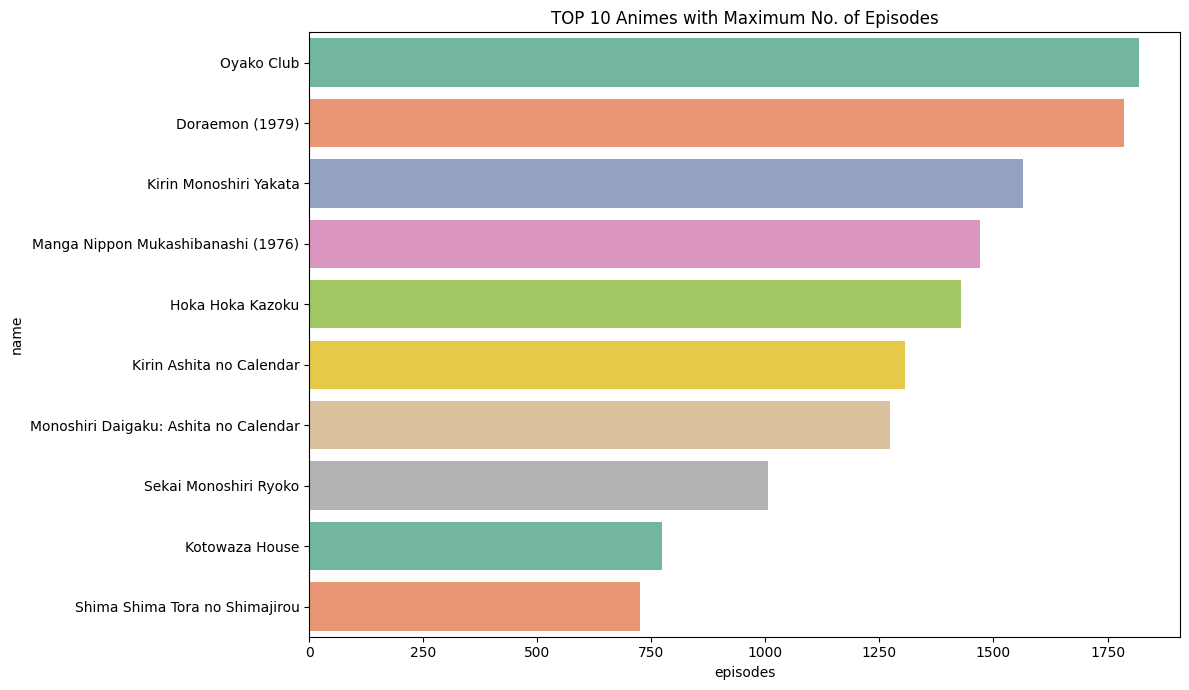

In [10]:
### Univarriable analysis

# display anime with most episodes 
anime_most_ep= anime_data.sort_values(by = 'episodes' , ascending= False) ## descending sorting
anime_most_ep = anime_most_ep.head(10)

# plotiing bar chart
plt.figure(figsize=(12,7))

sns.barplot(data= anime_most_ep, x='episodes', y='name', palette='Set2')
plt.title('TOP 10 Animes with Maximum No. of Episodes')

plt.tight_layout()
plt.show()

C:\Users\sanku\AppData\Local\Temp\ipykernel_11380\744297219.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = anime_type.index, y= anime_type.values, palette= 'Set3')


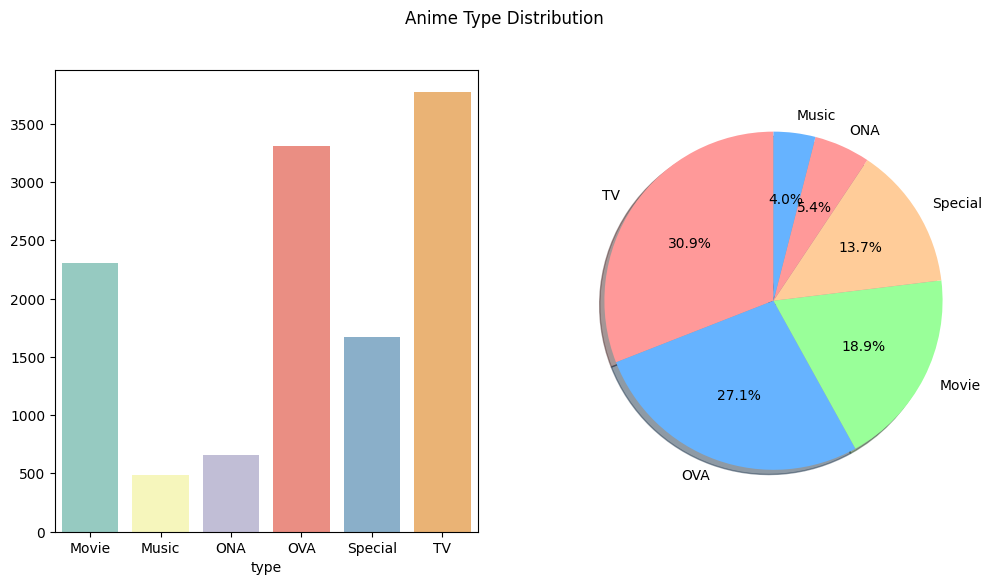

In [11]:
# display distribution of anime by type
anime_type = anime_data.groupby(by = 'type')['name'].count()
plt.figure(figsize=(12,6))

# visualize
plt.subplot(1,2,1)
sns.barplot(x = anime_type.index, y= anime_type.values, palette= 'Set3')

plt.subplot(1,2,2)
type_counts= anime_data['type'].value_counts()
plt.pie(type_counts, labels= type_counts.index, autopct='%1.1f%%', startangle=90, shadow=True, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.suptitle('Anime Type Distribution')
plt.show()

C:\Users\sanku\AppData\Local\Temp\ipykernel_11380\2408603403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=anime_high_rating[:10], x='rating', y='name', palette= 'rainbow')


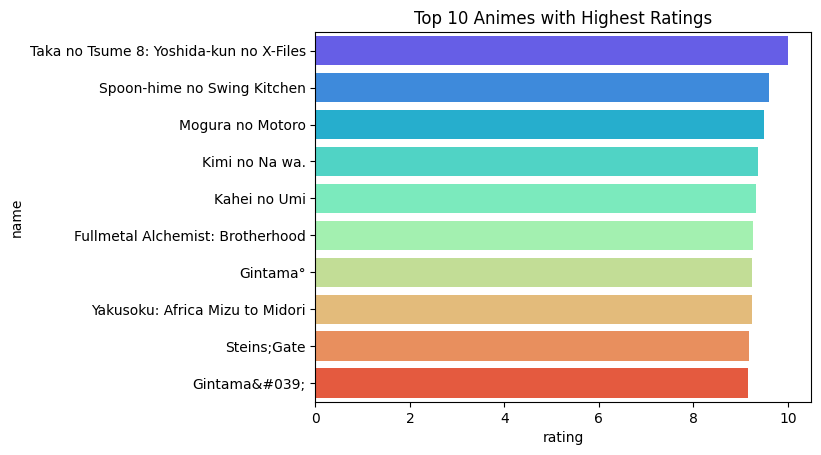

,name,rating
10419,Taka no Tsume 8: Yoshida-kun no X-Files,10.00
10356,Spoon-hime no Swing Kitchen,9.60
9557,Mogura no Motoro,9.50
0,Kimi no Na wa.,9.37
9047,Kahei no Umi,9.33
1,Fullmetal Alchemist: Brotherhood,9.26
2,Gintama°,9.25
10739,Yakusoku: Africa Mizu to Midori,9.25
3,Steins;Gate,9.17
4,Gintama&#039;,9.16


In [12]:
## displaying with highest ratings]
ahr = anime_data.sort_values(by = 'rating', ascending=False)# descending order
anime_high_rating = ahr.head(10)

sns.barplot(data=anime_high_rating[:10], x='rating', y='name', palette= 'rainbow')
plt.title('Top 10 Animes with Highest Ratings')
plt.show()

anime_high_rating[['name','rating']]

C:\Users\sanku\AppData\Local\Temp\ipykernel_11380\1718999062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ahr, x='rating', y= 'name', palette='tab20')


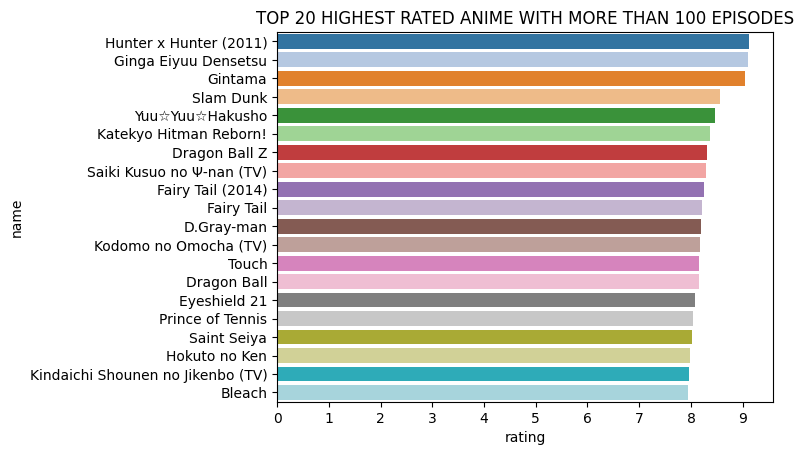

In [13]:
# display highest rating with more than 100 eps
ahr = ahr[ahr['episodes']>100]
ahr = ahr.head(20)
#visualize 
sns.barplot(data=ahr, x='rating', y= 'name', palette='tab20')
plt.title('TOP 20 HIGHEST RATED ANIME WITH MORE THAN 100 EPISODES')
plt.xticks(ticks=range(0,int(ahr['rating'].max()) +1,1))
plt.show()


C:\Users\sanku\AppData\Local\Temp\ipykernel_11380\4159240927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=popanm, x='members', y='name', palette='Set2')


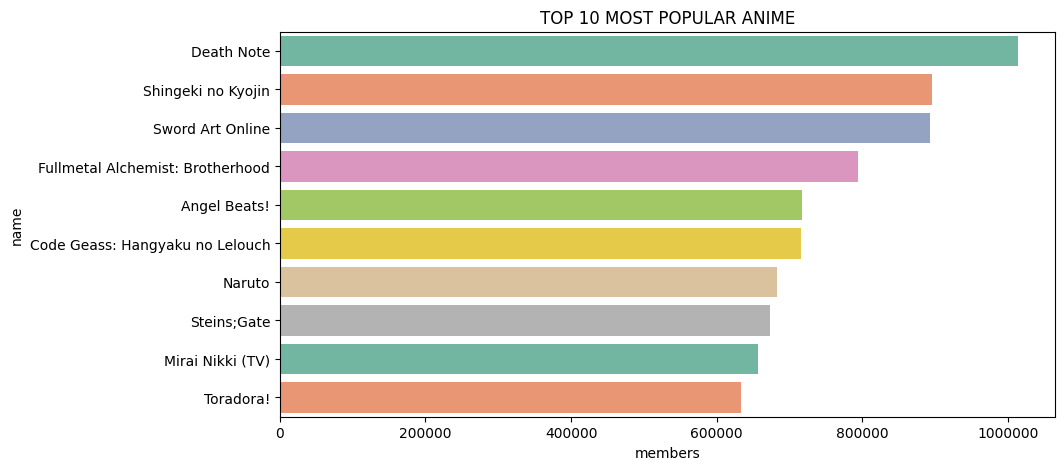

In [14]:
## Displaying most popular anime
popanm= anime_data.sort_values(by='members', ascending=False)
popanm = popanm.head(10)

# visualize
plt.figure(figsize=(10,5))
sns.barplot(data=popanm, x='members', y='name', palette='Set2')
plt.title('TOP 10 MOST POPULAR ANIME')
plt.ticklabel_format(style='plain', axis='x') # x axis display its original value
plt.show()

C:\Users\sanku\AppData\Local\Temp\ipykernel_11380\3489240786.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['count'], y=df['name'], orient='h', palette='Set3')


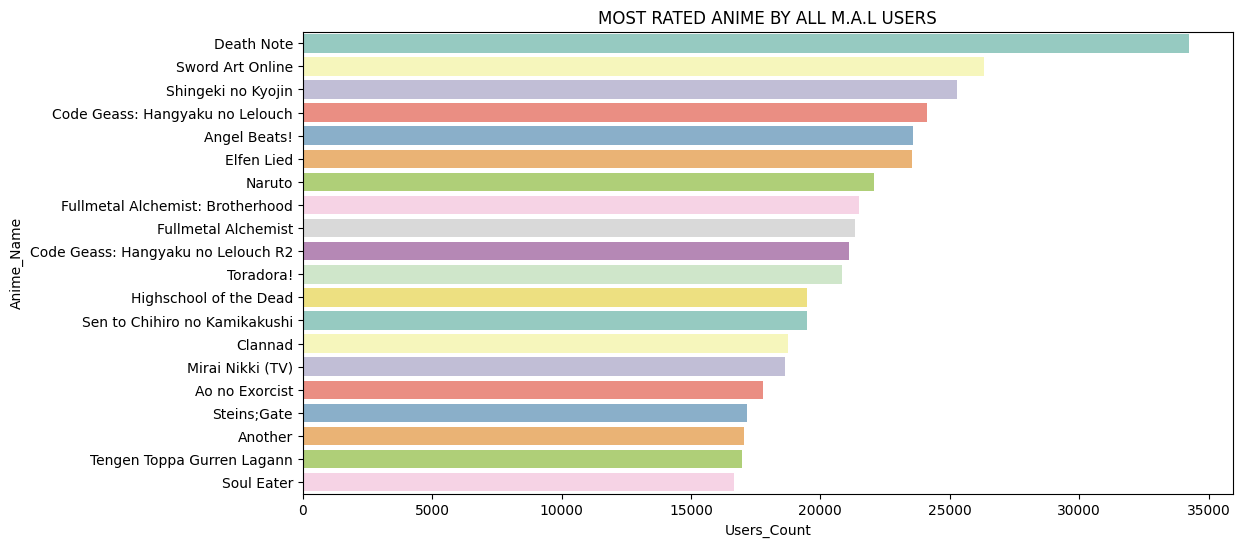

In [15]:
# Showing Most rated anime by user
most_rated_anime = rating_data.groupby(by='anime_id')['user_id'].count()
most_rated_anime_sorted = most_rated_anime.sort_values(ascending=False).head(20)

# findiing anime name
aime = anime_data[anime_data['anime_id'].isin(most_rated_anime_sorted.index)]
anime_sorted = anime.set_index('anime_id').loc[most_rated_anime_sorted.index].reset_index() ## adjsut the data frame sequence

# converting to data frame
dict = {'name' :anime_sorted['name'],
        'count':most_rated_anime_sorted.values}
df = pd.DataFrame(data=dict)
#visualize
plt.figure(figsize=(12,6))
sns.barplot(x=df['count'], y=df['name'], orient='h', palette='Set3')
plt.title('MOST RATED ANIME BY ALL M.A.L USERS')
plt.xlabel('Users_Count')
plt.ylabel('Anime_Name')
plt.show()

C:\Users\sanku\AppData\Local\Temp\ipykernel_11380\2148932625.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = gen_count['genre'], y=gen_count['frequency'], palette= 'tab20')


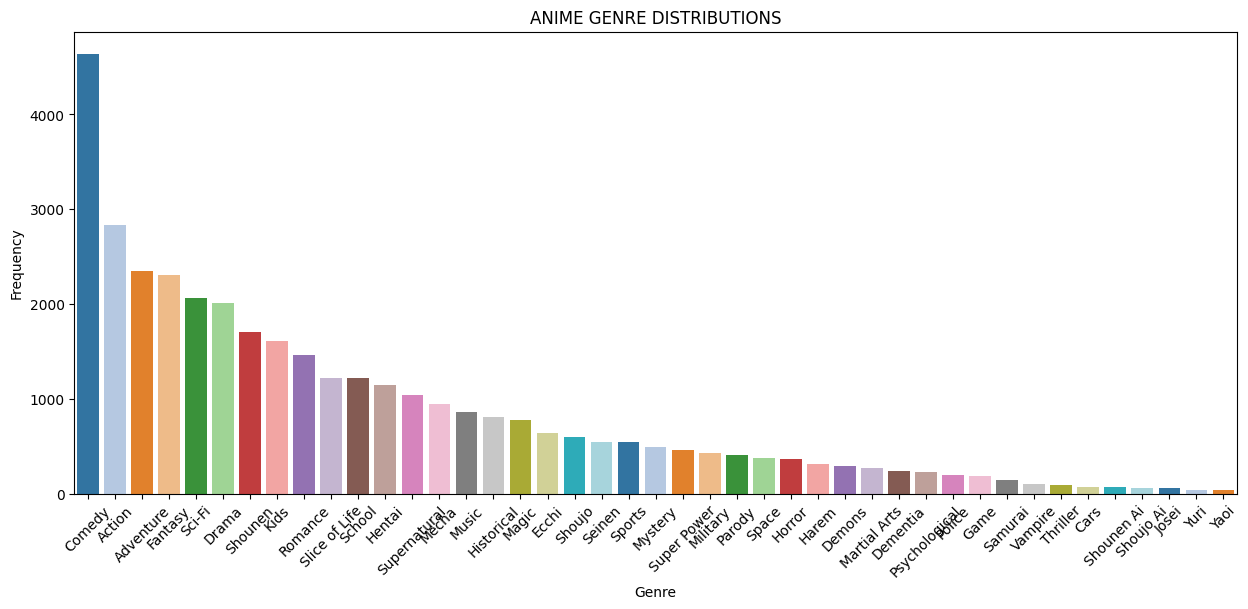

In [17]:
# Visualize genre distribution
from collections import Counter
gen = anime_data['genre'].apply(lambda x: x.split(', ') )
allgen = sum(gen,start=[]) # split into single string
gen_count = Counter(allgen)
gen_count = pd.DataFrame(data=gen_count.items(), columns=['genre', 'frequency']).sort_values(by = 'frequency', ascending=False)
#display
plt.figure(figsize=(15,6))

sns.barplot(x = gen_count['genre'], y=gen_count['frequency'], palette= 'tab20')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('ANIME GENRE DISTRIBUTIONS')
plt.xticks(rotation= 45)
plt.show()